### **Natural Language Processing Project 1 - Ashok Shanmuga Sundaram** 

## **PART-1 - Objective:**
The objective is to build a NLP classifier which can use input text parameters to determine the label/s of the blog


### **1.0 Importing the Libraries**

In [8]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.4.1'

In [9]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

### **1.1. Importing and Analysing the dataset**


In [11]:
from google.colab import drive

In [12]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
# Adding path to the folder where dataset file is located
project_path = '/content/drive/My Drive/AIML/Projects/NLP1/'

In [14]:
# Loading the dataset
blog_df = pd.read_csv(project_path + "blogtext.csv")

In [15]:
# checking the shape of the data frame
blog_df.shape

(681284, 7)

In [16]:
#checking if the data frame is properly loaded using the sample() method
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
528347,955372,female,16,Student,Aries,"23,April,2003",The library nazi seems... pleasant toda...
181946,3755083,female,14,Science,Aries,"13,August,2004","Mood=Lazy Well, here I am, starting y..."
35179,3169212,female,15,Student,Cancer,"01,August,2004",Col. Jack O'Neill: Pretty good actuall...
493765,2543830,female,14,Arts,Virgo,"15,May,2004","Ahhhh, yes. The play is finally over. ..."
60111,3451421,male,23,Student,Taurus,"02,June,2004",Journal 2-2 Patrick Milin...


In [17]:
#Limiting the data and using fewer rows as the data size is large
blog_df = pd.read_csv(project_path + "blogtext.csv",nrows=100000)

In [18]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [19]:
#checking last 5 rows of the data frame using the tail() method
blog_df.tail()

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


In [20]:
#checking the feature/columns  using the info method
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [21]:
blog_df.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

**Performing EDA**

In [22]:
#chcecking for na values
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

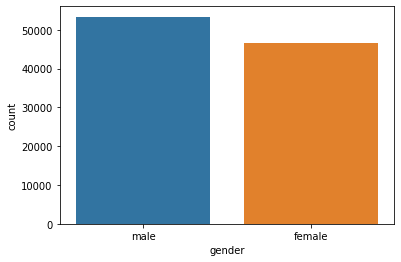

In [23]:
sns.countplot(x='gender',data=blog_df)

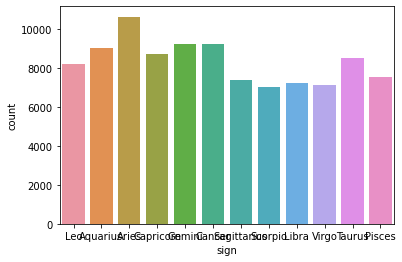

In [24]:
sns.countplot(x='sign',data=blog_df)

In [25]:
#checking for null values
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

**Observations in the limited rows taken from dataset:**
1. There are no 'null' values and 'na' values 
2. Count of males is higher than females
3. Count of people with Astrological sign - 'Aries' is higher when compared to people with other astrological signs

### **1.2. Performing Data Preprocessing**

In [26]:
# removing unwanted characters other than alphanumeric
pattern = "[^\w ]"
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern,"",s))

In [27]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [28]:
#coverting text to lowercase
blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [29]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [30]:
#removing unwanted spaces
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [31]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [32]:
import nltk
nltk.download('stopwords')

#removing stopwords
stopwords=set(stopwords.words('english'))
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [34]:
# dropping id and date columns
blog_df.drop(labels=['id','date'], axis=1,inplace=True)

In [35]:
blog_df.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...


In [36]:
# Target/label merger and transformation: As we want to make this into a multi-label classification problem, hence merging all the label columns together 
# so that we have all the labels together for a particular sentence
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [37]:
blog_df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [38]:
#dropping  gender,age,topic & sign as they are already merged to labels column
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [39]:
blog_df.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [40]:
# Train and Test split : Separating features and labels and split the data into training and testing
X= blog_df.text
y = blog_df.labels

In [41]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [42]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [43]:
print(X_test.shape)
print(y_test.shape)

(20000,)
(20000,)


In [44]:
X_test

6448                      bird buries head mashed potatoes
50680    ok seriously ruined day like mad right wouldnt...
814      astro vs braves got back minute maid stadium d...
20354    greetings welcome first ever blog concept behi...
49224    walks door room always brightens perfect figur...
                               ...                        
47661    hey cool jo problem understandable sounds lots...
56256    last night went see new harry potter movie hon...
92555    urllink instant messages come bearing malice i...
36328    srajan gamers sections class 8th entered compu...
73345    monqiue got back together wasnt quite dramatic...
Name: text, Length: 20000, dtype: object

In [45]:
# Vectorisation of features:
'''
a. Creating a Bag of Words using count vectorizer
i. Use ngram_range=(1, 2)
ii. Vectorize training and testing features

b. Print the term-document matrix
'''
cvect = CountVectorizer(ngram_range=(1,2))

In [46]:
#Feeding training data to CountVectorizer
cvect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [47]:
#Checking the vocablury size
len(cvect.vocabulary_)

4517090

In [48]:
cvect.get_feature_names()

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning',
 '00 really',
 '00 silver',
 '00 sometimes',
 '00 soooooo',
 '00 sq',
 '00 tcr1',
 '00 tie',
 '00 uppercase_75_100',
 '00 watch',
 '00 well',
 '000',
 '000 address',
 '000 available',
 '000 best',
 '000 calories',
 '000 cheaper',
 '000 comptes',
 '000 could',
 '000 duration',
 '000 et',
 '000 first',
 '000 ft',
 '000 fulltime',
 '000 good',
 '000 heh',
 '000 leaving',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 pounds',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 seems',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 years',
 '000 yen',
 '0000',
 '0000 arent',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 new',
 '0000 showed',
 '0000 still',
 '0000 subject',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 zero',
 '000000000000000000000000167',
 '000000000000000000000000167 grams',
 '000000000000000000000section',
 '0000

### **1.3. Designing, train tune and testing the best text classifier**

In [49]:
X_train_ct = cvect.transform(X_train)

In [50]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [51]:
X_train_ct

<80000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 13894625 stored elements in Compressed Sparse Row format>

In [52]:
X_train_ct[0]

<1x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 483 stored elements in Compressed Sparse Row format>

In [53]:
X_test_ct = cvect.transform(X_test)

In [54]:
X_test_ct

<20000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 2633973 stored elements in Compressed Sparse Row format>

In [55]:
cvect.get_feature_names()[:10]

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning']

In [56]:
print(X_train_ct)

  (0, 10607)	1
  (0, 10627)	1
  (0, 11033)	1
  (0, 11034)	1
  (0, 13953)	1
  (0, 13954)	1
  (0, 42119)	1
  (0, 42120)	1
  (0, 43719)	1
  (0, 43827)	1
  (0, 67010)	1
  (0, 67011)	1
  (0, 92180)	1
  (0, 92184)	1
  (0, 113011)	1
  (0, 113907)	1
  (0, 120596)	2
  (0, 123016)	2
  (0, 181859)	1
  (0, 181920)	1
  (0, 244805)	1
  (0, 244878)	1
  (0, 258494)	1
  (0, 258690)	1
  (0, 263762)	1
  :	:
  (79999, 489553)	1
  (79999, 490590)	1
  (79999, 685736)	1
  (79999, 686275)	1
  (79999, 987793)	1
  (79999, 990497)	1
  (79999, 1275446)	1
  (79999, 1664615)	1
  (79999, 1668927)	1
  (79999, 1934343)	1
  (79999, 1936464)	1
  (79999, 2334456)	1
  (79999, 2335872)	1
  (79999, 2680191)	1
  (79999, 2682769)	1
  (79999, 2689599)	1
  (79999, 2690051)	1
  (79999, 3250596)	1
  (79999, 3250640)	1
  (79999, 3892432)	1
  (79999, 3894880)	1
  (79999, 3948360)	1
  (79999, 3948560)	1
  (79999, 4052512)	1
  (79999, 4052642)	1


In [57]:
print(X_test_ct)

  (0, 466872)	1
  (0, 584973)	1
  (0, 584975)	1
  (0, 1781828)	1
  (0, 2442107)	1
  (0, 2442126)	1
  (0, 3036818)	1
  (1, 8711)	1
  (1, 9452)	1
  (1, 21144)	1
  (1, 67661)	1
  (1, 67771)	1
  (1, 74496)	1
  (1, 78471)	1
  (1, 120596)	2
  (1, 121772)	1
  (1, 126920)	1
  (1, 157801)	2
  (1, 157893)	1
  (1, 178920)	1
  (1, 182108)	1
  (1, 182417)	1
  (1, 183363)	2
  (1, 194027)	1
  (1, 202361)	5
  :	:
  (19999, 3380016)	1
  (19999, 3561611)	1
  (19999, 3575363)	1
  (19999, 3710895)	1
  (19999, 3711708)	1
  (19999, 3757318)	1
  (19999, 3899740)	1
  (19999, 3899777)	1
  (19999, 3934893)	2
  (19999, 3935016)	1
  (19999, 3948360)	1
  (19999, 3952264)	1
  (19999, 4013296)	1
  (19999, 4013848)	1
  (19999, 4021460)	1
  (19999, 4023561)	1
  (19999, 4223852)	1
  (19999, 4223914)	1
  (19999, 4284488)	1
  (19999, 4285835)	1
  (19999, 4304472)	1
  (19999, 4330559)	1
  (19999, 4330886)	1
  (19999, 4363071)	1
  (19999, 4423255)	1


In [58]:
# Creating a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [59]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 528,
 'Advertising': 766,
 'Agriculture': 168,
 'Aquarius': 9050,
 'Architecture': 83,
 'Aries': 10637,
 'Arts': 5031,
 'Automotive': 124,
 'Banking': 354,
 'Biotech': 324,
 'BusinessServices': 626,
 'Cancer': 9253,
 'Capricorn': 8723,
 'Chemicals': 305,
 'Communications-Media': 2830,
 'Construction': 250,
 'Consulting': 905,
 'Education': 5553,
 'Engineering': 2332,
 'Environment': 6,
 'Fashion': 1898,
 'Gemini': 9225,
 'Government': 2055,
 'HumanResources': 209,
 'Internet': 2251,
 'InvestmentBanking': 244,
 'Law': 360,
 'LawEnforcement-Security': 368,
 'Leo': 8230,
 'Libra': 7250,
 'Manufacturing': 542,
 'Maritime': 59,
 'Marketing': 726,
 'Military': 798,
 'Museums-Libraries': 308,
 'Non-Profit': 1326,
 'Pisces'

In [60]:
#Transforming the labels:
'''
Each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. 
For this purpose, it is convenient to use MultiLabelBinarizer from sklearn. Hence, converting train and test labels using MultiLabelBinarizer
'''
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [61]:
y_train = binarizer.fit_transform(y_train)

In [62]:
y_test = binarizer.transform(y_test)

In [63]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [64]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

Text classifier is chosen as Logistic Regression.It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

In [65]:
'''
Fitting the classifier, making predictions and printing:
1. Accuracy score 
2. F1 score 
3. Average precision score 
4. Average recall score
'''
# One-vs-Rest approach is used which is implemented in OneVsRestClassifier class. In this approach, k classifiers (= number of tags) are trained.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [67]:
Ypred=model.predict(X_test_ct)

In [68]:
Ypred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [69]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

### **1.4. Displaying the classification report**
In Micro-average method: the individual true positives, false positives, and false negatives of the system for different sets are summed up and the applied to get the statistics.

In Macro-average Method : the average of the precision and recall of the system on different sets are taken

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))

In [71]:
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

In [72]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.1085
F1 score: Micro 0.4772290809327846
Average precision score: Micro 0.28872102074235806
Average recall score: Micro 0.3479


In [73]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.1085
F1 score: Macro 0.15645343614049567
Average recall score: MAcro 0.10385235689453302


In [74]:
display_metrics_weighted(y_test,Ypred)

Accuracy score:  0.1085
F1 score: weighted 0.43623221118939215
Average precision score: weighted 0.3895466577910168
Average recall score: weighted 0.3479


### **1.5 Printing the true vs predicted labels for any 5 entries from the dataset**

In [75]:
preds = Ypred[:15]
actuals = y_test[:15]

In [76]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Aries', 'Fashion', 'male'),
 ('Libra', 'Student', 'male'),
 ('Sagittarius', 'indUnk', 'male'),
 ('Aquarius', 'indUnk', 'male'),
 ('Cancer', 'Student', 'male'),
 ('Pisces', 'Transportation', 'male'),
 ('Arts', 'Capricorn', 'female'),
 ('Capricorn', 'Student', 'male'),
 ('Cancer', 'Religion', 'male'),
 ('Libra', 'indUnk', 'male'),
 ('Aquarius', 'female', 'indUnk'),
 ('Capricorn', 'Consulting', 'female'),
 ('Virgo', 'indUnk', 'male'),
 ('Internet', 'Sagittarius', 'male'),
 ('Scorpio', 'Technology', 'male')]

In [77]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[(),
 ('Student', 'female'),
 ('female',),
 ('male',),
 ('Cancer', 'female'),
 ('Pisces', 'Transportation', 'male'),
 ('female',),
 ('Student',),
 ('Religion', 'female'),
 ('male',),
 ('female',),
 ('Consulting', 'female'),
 ('female',),
 ('male',),
 ('Scorpio', 'male')]

In [78]:
print(binarizer.inverse_transform(Ypred)[776])
print(binarizer.inverse_transform(y_test)[776])

('Student', 'Virgo', 'male')
('Student', 'Virgo', 'male')


In [79]:
print(binarizer.inverse_transform(Ypred)[444])
print(binarizer.inverse_transform(y_test)[444])

()
('Libra', 'female', 'indUnk')


In [80]:
print(binarizer.inverse_transform(Ypred)[199])
print(binarizer.inverse_transform(y_test)[199])

('Cancer', 'Education', 'Pisces', 'male')
('Education', 'Pisces', 'male')


In [87]:
print(binarizer.inverse_transform(Ypred)[299])
print(binarizer.inverse_transform(y_test)[299])

('Aries', 'Communications-Media', 'male')
('Aries', 'Communications-Media', 'male')


In [88]:
print(binarizer.inverse_transform(Ypred)[349])
print(binarizer.inverse_transform(y_test)[349])

('indUnk', 'male')
('Virgo', 'female', 'indUnk')


**Conclusion:**

1. Multilabel classification problem that predicts multiple features of the author of a given text has been solved
2. The data from given dataset has been loaded and basic EDA has been performed
3. Data Preprocessing - removing the unnecessary characters, removing the spaces, converting words to lower case, removing the stop words, vectorizing the features - have been done
4. Designed, trained and tested with the best text classifier - Logistic Regression and the predictions are made and also the accuracy, f1 score, Avg precision and recall scores are calculated
6. The true vs predicted labels for any 5 entries from the dataset have been printed

## **PART-2 - Objective:**
The objective is to design a python based interactive semi - rule based chatbot

Below code is executed in Jupyter Notebook separately as tkinter package cannot be executed in Google colab. The output screen shot is attached in the word file uploaded

### 2.1 Installing tkintertable and importing needed packages

In [1]:
!pip install tkintertable

In [2]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
import numpy

### 2.2 Creating Chatbot model using given JSON file

In [3]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open("D:/anaconda/ashok/Project/NLP1/GL_Bot.json").read()
intents = json.loads(data_file)


for intent in intents['intents']:
    for pattern in intent['patterns']:

        # take each word and tokenize it
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        # adding documents
        documents.append((w, intent['tag']))

        # adding classes to our class list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print (len(documents), "documents")

print (len(classes), "classes", classes)

print (len(words), "unique lemmatized words", words)


pickle.dump(words,open("D:/anaconda/ashok/Project/NLP1/words.pkl",'wb'))
pickle.dump(classes,open("D:/anaconda/ashok/Project/NLP1/classes.pkl",'wb'))

# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:
    # initializing bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")


# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save("D:/anaconda/ashok/Project/NLP1/chatbot_model.h5", hist)

print("model created")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashok.s\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashok.s\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


128 documents
8 classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
158 unique lemmatized words ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimi

<ipython-input-3-915f817aa042>:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training = np.array(training)


Epoch 1/200
26/26 [==============================] - 0s 1ms/step - loss: 2.0996 - accuracy: 0.1328
Epoch 2/200
26/26 [==============================] - 0s 3ms/step - loss: 1.9057 - accuracy: 0.2969
Epoch 3/200
26/26 [==============================] - 0s 2ms/step - loss: 1.8524 - accuracy: 0.2422
Epoch 4/200
26/26 [==============================] - 0s 2ms/step - loss: 1.7650 - accuracy: 0.3281
Epoch 5/200
26/26 [==============================] - 0s 2ms/step - loss: 1.6874 - accuracy: 0.3516
Epoch 6/200
26/26 [==============================] - 0s 2ms/step - loss: 1.4986 - accuracy: 0.5156
Epoch 7/200
26/26 [==============================] - 0s 2ms/step - loss: 1.4634 - accuracy: 0.4922
Epoch 8/200
26/26 [==============================] - 0s 2ms/step - loss: 1.3359 - accuracy: 0.5391
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 1.1892 - accuracy: 0.5781
Epoch 10/200
26/26 [==============================] - 0s 2ms/step - loss: 0.9846 - accuracy: 0.6797
Epoch 11/

26/26 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9922
Epoch 83/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 84/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9922
Epoch 85/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9922
Epoch 86/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9922
Epoch 87/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9922
Epoch 88/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9922
Epoch 89/200
26/26 [==============================] - 0s 930us/step - loss: 0.0369 - accuracy: 0.9766
Epoch 90/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 91/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9922
Epoch 92/20

26/26 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 163/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 164/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 165/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 166/200
26/26 [==============================] - 0s 881us/step - loss: 0.0090 - accuracy: 1.0000
Epoch 167/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 168/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 169/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 170/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 171/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Ep

### 2.3 Creating Chat GUI

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np

#import tensorflow
from tensorflow.python.keras.models import load_model
#from keras.models import load_model
model = load_model("D:/anaconda/ashok/Project/NLP1/chatbot_model.h5")
import json
import random
intents = json.loads(open('D:/anaconda/ashok/Project/NLP1/GL_Bot.json').read())
words = pickle.load(open('D:/anaconda/ashok/Project/NLP1/words.pkl','rb'))
classes = pickle.load(open('D:/anaconda/ashok/Project/NLP1/classes.pkl','rb'))


def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res


#Creating GUI with tkinter
import tkinter
from tkinter import *


def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)

    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))

        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')

        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)


base = Tk()
base.title("GL Chatbot")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)

base.mainloop()

### Conclusion:

Created semi rule based Chat bot which can :

1. Start chat session with greetings and ask what the user is looking for
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it